## Problema cap.1.5 -Regressão linear pelo método dos mínimos quadráticos

Quando se tem um conjunto 𝑥,𝑦 de N medições, o método dos mínimos  quadráticos oferece o ajuste linear que apresenta a menor diferença entre os valores medidos e os estimados por uma reta 𝑦=𝑚 𝑥+𝑏. Se se considerar que os erros que afetam os valores de 𝑦 são iguais, as expressões que o método fornece  são:
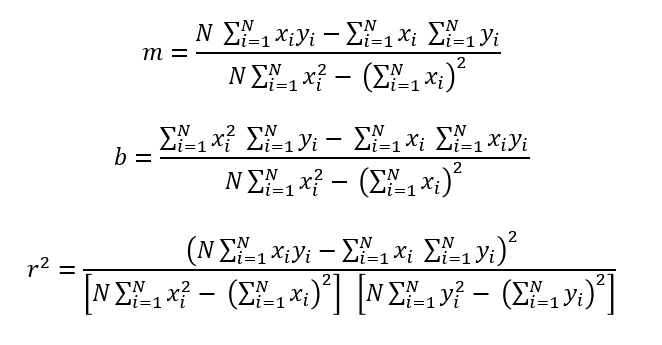

O coeficiente de determinação $𝑟^2$ é tal que quando ~1 indica um ótimo ajuste, enquanto que ~ 0 indica que o modelo não é linear. 


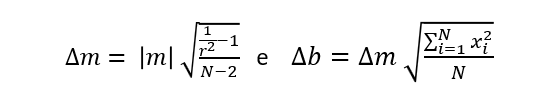
Escreva um programa em python que calcule as quantidades anteriores. Como teste ao programa escrito, compare os seus resultados com os de um problema conhecido, indicado na tabela abaixo, 
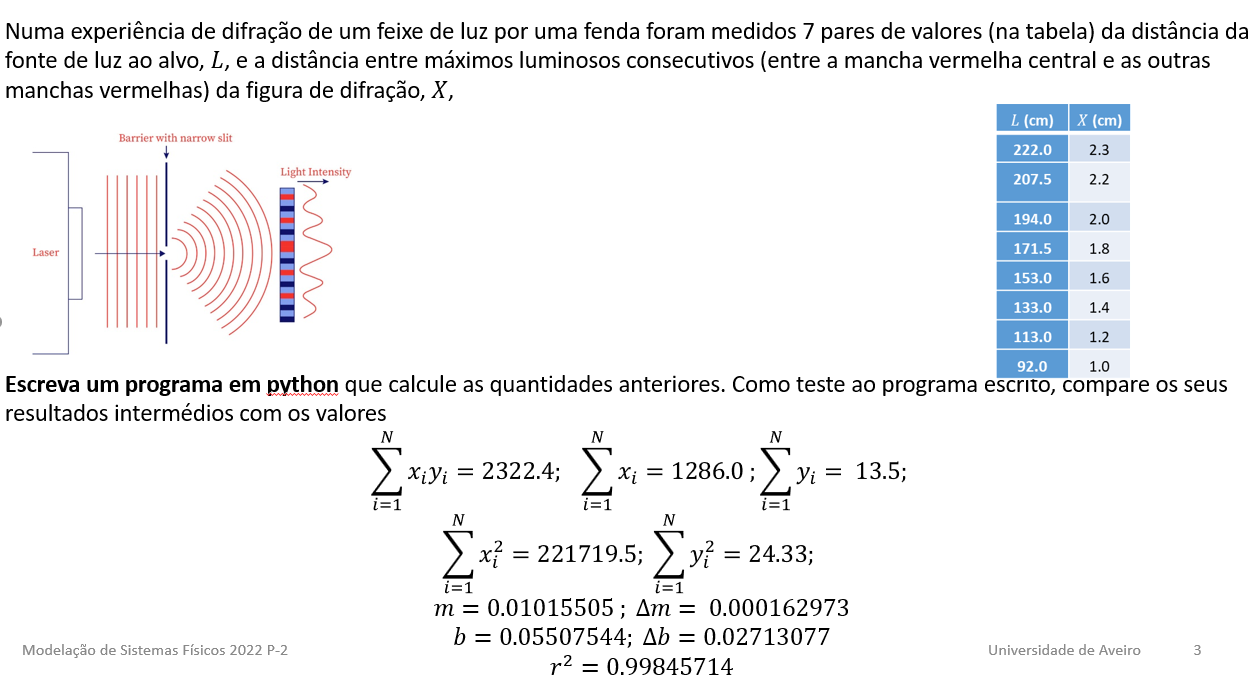


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sigfig

class Regression:
    def __init__(self, x_values=None, y_values=None):
        self._x_values = x_values
        self._y_values = y_values
        self._N = len(self._x_values)
        self._sum_xy = None
        self._sum_x = None
        self._sum_y = None
        self._sum_pow_x_2 = None
        self._sum_pow_y_2 = None
        self._slope = None
        self._b_value = None
        self._err_slope = None
        self._err_b_value = None
        self._r_2 = None
        
    def sum_xy(self):
        self._sum_xy = np.sum(self._x_values*self._y_values)
        return self._sum_xy
        
    def sum_x(self):
        self._sum_x = np.sum(self._x_values)
        return self._sum_x
    
    def sum_y(self):
        self._sum_y = np.sum(self._y_values)
        return self._sum_y
    
    def sum_pow_x_2(self):
        self._sum_pow_x_2 = np.sum(self._x_values**2)
        return self._sum_pow_x_2
    
    def sum_pow_y_2(self):
        self._sum_pow_y_2 = np.sum(self._y_values**2)
        return self._sum_pow_y_2
        
    def slope(self):
        self._slope = (self._N*self.sum_xy()-self.sum_x()*self.sum_y())/(self._N*self.sum_pow_x_2()-self.sum_x()**2)
        return self._slope
        
    def b_value(self):
        self._b_value = (self.sum_pow_x_2()* self.sum_y() - self.sum_x()*self.sum_xy())/(self._N*self.sum_pow_x_2()-self.sum_x()**2)
        return self._b_value
    
    def  r_2(self):
        self._r_2 = (self._N*self.sum_xy()-self.sum_x()*self.sum_y())**2/((self._N*self.sum_pow_x_2()-self.sum_x()**2)*(self._N*self.sum_pow_y_2()-self.sum_y()**2))
        return self._r_2
    
    def err_slope(self):        
        self._err_slope = np.abs(self._slope)*np.sqrt(((1/self._r_2)-1)/(self._N-2))
        return self._err_slope
    
    def err_b_value(self):
        self._err_b_value = self._err_slope*np.sqrt(self._sum_pow_x_2/self._N)
        return self._err_b_value
    
    def apply_regression(self):
        self.sum_xy()
        self.sum_x()
        self.sum_y()
        self.sum_pow_x_2()
        self.sum_pow_y_2()
        self.slope()
        self.b_value()
        self.r_2()
        self.err_slope()
        self.err_b_value()
        print("REGRESSION RESULTS")
        print("------------------")
        print("Sum_xy: {}".format(self.sum_xy()))
        print("Sum_x: {}".format(self.sum_x()))
        print("Sum_y: {}".format(self.sum_y()))
        print("sum_pow_x_2: {}".format(self.sum_pow_x_2()))
        print("sum_pow_y_2: {}".format(self.sum_pow_y_2()))
        print("slope (m): {} +- {}".format(self.slope(), self.err_slope()))
        print("b: {} +- {}".format(self.b_value(), self.err_b_value()))
        print("r^2: {}".format(self.r_2()))
        

In [89]:
L = np.array([222.0, 207.5, 194.0, 171.5, 153.0, 133.0, 113.0, 92], dtype=np.float32) # cm
X = np.array([2.3, 2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0], dtype=np.float32)

a) Comece por representar os dados experimentais num gráfico.  

Text(0, 0.5, 'L')

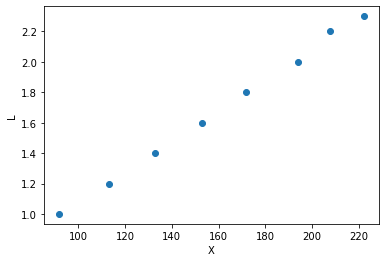

In [71]:
plt.scatter(L,X)
plt.xlabel("X")
plt.ylabel("L")

b) Calcular as somas das expressões acima.

In [72]:
r = Regression(L, X)
print("Sum_xy: {}".format(r.sum_xy()))
print("Sum_x: {}".format(r.sum_x()))
print("Sum_y: {}".format(r.sum_y()))
print("Sum_x2: {}".format(r.sum_pow_x_2()))
print("Sum_y2: {}".format(r.sum_pow_y_2()))

Sum_xy: 2322.39990234375
Sum_x: 1286.0
Sum_y: 13.5
Sum_x2: 221719.5
Sum_y2: 24.329998016357422


c) De seguida calcule o declive, a ordenada na origem e o coeficiente de determinação ou de correlação 𝑟2
. 

In [73]:
r.apply_regression()

REGRESSION RESULTS
------------------
Sum_xy: 2322.39990234375
Sum_x: 1286.0
Sum_y: 13.5
sum_pow_x_2: 221719.5
sum_pow_y_2: 24.329998016357422
slope (m): 0.010155045171307102 +- 0.00016296902798402903
b: 0.05507669223074358 +- 0.027130764211550813
r^2: 0.9984571379107345


Text(0, 0.5, 'L')

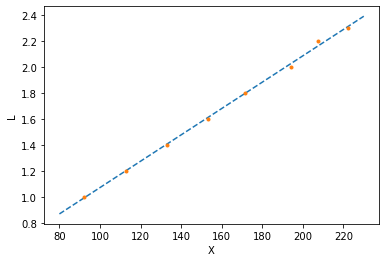

In [74]:
x_g = np.arange(80,240,10)
l_g = r.slope() * x_g + r.b_value()
plt.plot(x_g,l_g,'--')
plt.plot(L,X,".")
plt.xlabel("X")
plt.ylabel("L")

e) Encontre o valor de 𝑋, quando 𝐿=165.0 cm. Use a reta determinada pela regressão linear.

In [84]:
L_v =165.0
X_v = (L_v - r.b_value()) / r.slope()
X_V = sigfig.round(X_v, sigfigs = 4)
print("X = {} cm".format(X_v))

X = 16242.657765207994 cm


f) Afaste da reta encontrada um dos valores medidos de 𝑦. Compare o coeficiente de determinação com o valor anterior. Faça um gráfico com os novos pontos experimentais e a nova reta.

REGRESSION RESULTS
------------------
Sum_xy: 2460.10009765625
Sum_x: 1286.0
Sum_y: 14.40000057220459
sum_pow_x_2: 221719.5
sum_pow_y_2: 28.01999855041504
slope (m): 0.009689899888504501 +- 0.0027734541740115494
b: 0.2423495331777259 +- 0.46171921240165265
r^2: 0.6704501332850102


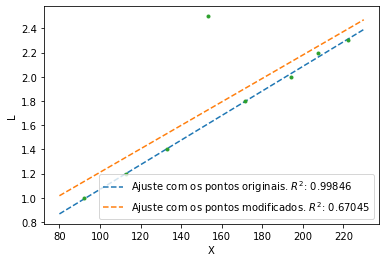

In [97]:

X = np.array([2.3, 2.2, 2.0, 1.8, 2.5, 1.4, 1.2, 1.0], dtype=np.float32)

r_new = Regression(L, X)
r_new.apply_regression()

x_g = np.arange(80,240,10)
l_g = r.slope() * x_g + r.b_value()
l_g_new = r_new.slope() * x_g + r_new.b_value()
plt.plot(x_g,l_g,'--', label="Ajuste com os pontos originais. $R^2$: {}".format(np.round(r.r_2(),5)))
plt.plot(x_g,l_g_new,'--', label="Ajuste com os pontos modificados. $R^2$: {}".format(np.round(r_new.r_2(),5)))
plt.plot(L,X,".")
plt.xlabel("X")
plt.ylabel("L")
plt.legend()

## Problema cap.1.6 -Regressão linear pelo método dos mínimos quadráticos

Um ciclista tenta percorrer a velocidade constante (uniforme) uma distância de 10 km. 
O seu treinador nos primeiros 9 minutos e a cada minuto mede a distância percorrida, e regista os valores em km:


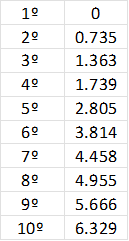
a) Apresente estas medições num gráfico. A analisar o gráfico, a relação entre o tempo e a distância percorrida é linear?


Text(0, 0.5, 'Distância (Km)')

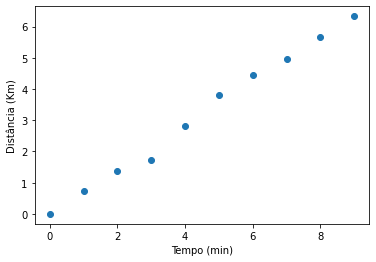

In [39]:
distancia = np.array([0.0, 0.735, 1.363, 1.739, 2.805, 3.814, 4.458, 4.955,5.666,6.329], dtype=np.float32) # cm
tempo = np.arange(0,len(distancia),1, dtype=np.float32)

plt.scatter(tempo,distancia)
plt.xlabel("Tempo (min)")
plt.ylabel("Distância (Km)")

**Podemos analisar pelo o gráfico que a relação entre o tempo e a distância percorrida pelo atleta é aproximadamente linear**

b) Encontre o declive, a ordenada na origem, os erros respetivos e o coeficiente de determinação. É uma relação linear bem aproximada? O ciclista conseguiu manter a mesma velocidade uniforme durante o percurso?

$v (velocidade) = \frac{x (distância)}{t (tempo)} $

$ \implies  x= v * t $

Equação da recta: $  y = mx + b $

$ y : distância(x) $ 

$ m : velocidade (v) $

$ x : tempo (t) $

$ b : 0 $ parte da origem x = 0 para t = 0 


REGRESSION RESULTS
------------------
Sum_xy: 202.69000244140625
Sum_x: 45.0
Sum_y: 31.86400032043457
sum_pow_x_2: 285.0
sum_pow_y_2: 144.4223175048828
slope (m): 0.7188121448863637 +- 0.01999494795420351
b: -0.04825402462121212 +- 0.10674381197616213
r^2: 0.9938479525295615


Text(0, 0.5, 'Distância (Km)')

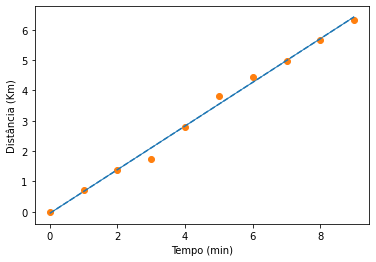

In [40]:
r_velocity = Regression(tempo, distancia)
r_velocity.apply_regression()
m_velocity = r_velocity.slope()
m_velocity = sigfig.round(m_velocity, sigfigs = 3)
b_velocity = r_velocity.b_value()
r_2_velocity = r_velocity.r_2()

error_slope= r_velocity.err_slope()
error_slope = sigfig.round(error_slope, sigfigs = 3)

distancia_aj = m_velocity * tempo + b_velocity
plt.plot(tempo,distancia_aj,'--')
plt.fill_between(tempo, distancia_aj-error_slope, distancia_aj+error_slope)
plt.scatter(tempo,distancia)
plt.xlabel("Tempo (min)")
plt.ylabel("Distância (Km)")

c) Qual a velocidade média do ciclista?

In [41]:
print(" A velocidade média do atleta é dada pelo declive da recta do ajuste linear")
print(" Velocidade = {} +- {} km/min".format(m_velocity, error_slope))

 A velocidade média do atleta é dada pelo declive da recta do ajuste linear
 Velocidade = 0.719 +- 0.02 km/min


d) Use a função polyfit dos pacote numpy ou do pacote pylab para encontrar a  reta que mais se aproxima das medições. 
O declive e a ordenada na origem concordam com os valores calculados na alínea b)? 
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

(array([ 0.71881212, -0.04825452]), array([0.26387604]), 2, array([1.35754456, 0.39632407]), 1.1920928955078125e-06)
(array([ 0.71881212, -0.04825452]), array([0.26387604]), 2, array([1.35754456, 0.39632407]), 1.1920928955078125e-06)
-0.048254522410305783


Text(0, 0.5, 'Distância (Km)')

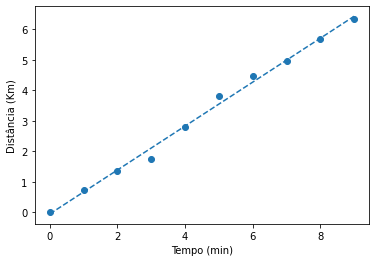

In [42]:
import pylab
fit_lab = pylab.polyfit(tempo,distancia, 1,full = True) #é a mesma função
fit_numpy = np.polyfit(tempo,distancia, 1, full=True, cov=True)

print(fit_numpy)


distancia_aj_2 = fit_numpy[0][0] * tempo + fit_numpy[0][1]
plt.plot(tempo,distancia_aj_2,'--')
plt.scatter(tempo,distancia)
plt.xlabel("Tempo (min)")
plt.ylabel("Distância (Km)")


e) Apresente a velocidade em km/hora.   

In [45]:
def km_min_to_km_hour(velocity):
    return velocity*60

vel_km_per_h = km_min_to_km_hour(m_velocity)
err_vel_km_per_h = km_min_to_km_hour(error_slope)
print("A velocidade do atleta é: {} +- {} km/h".format(vel_km_per_h, err_vel_km_per_h))

A velocidade do atleta é: 43.14 +- 1.2 km/h


## Medição e modelação
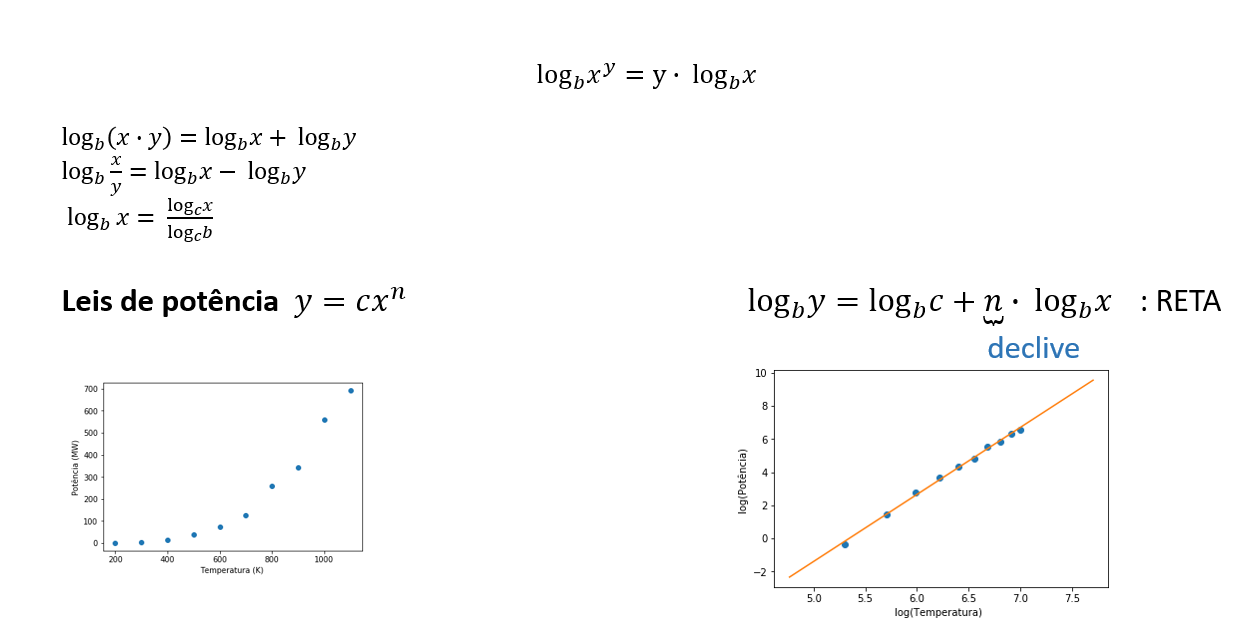

## Problema cap.1.8 -Regressão linear pelo método dos mínimos quadráticos
Foi medida a energia por segundo (potência) emitida por um corpo negro (corpo que absorve toda a energia que incide nele) de área 100 $cm^2$ em função da temperatura absoluta, 𝑇, e registada na seguinte tabela
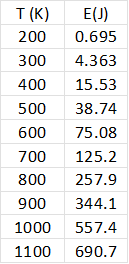


a) Apresente estas medições num gráfico. A analisar o gráfico, a relação entre a energia emitida e a temperatura é linear?


Text(0, 0.5, 'Energia (J)')

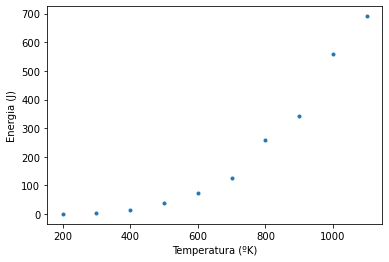

In [3]:
import numpy as np
temperatura = np.arange(200, 1200, 100)
energia = np.array([0.695, 4.363, 15.53, 38.74, 75.08, 125.2, 257.9, 344.1,557.4, 690.7])
plt.plot(temperatura,energia,'.')

plt.xlabel("Temperatura (ºK)")
plt.ylabel("Energia (J)")

**Como é possível observar pelo gráfico a relação entre a temperatura do corpo negro e a energia emitida pelo mesmo não é linear mas sim exponencial**

b) Apresente as medições num gráfico log-log. Qual a dependência entre as quantidade energia emitida e a temperatura? 

**A potência emitida por um corpo negro é dada pela Lei de Stefan - Boltzman**

$ P = \sigma T^4 $

$ \implies log P = log (\sigma T^4)$

$ log P = log( \sigma) + 4log (T) $

$ y : log P $

$ m : 4 $

$ b : log( \sigma) \implies \sigma = e^b$



Text(0, 0.5, 'log(Energia (J))')

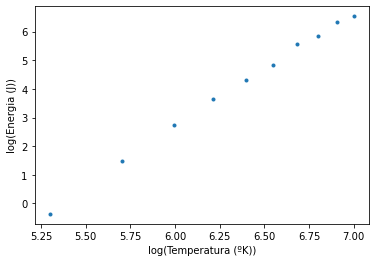

In [4]:
temperatura_log = np.log(temperatura)
energia_log = np.log(energia)
plt.plot(temperatura_log,energia_log,'.')

plt.xlabel("log(Temperatura (ºK))")
plt.ylabel("log(Energia (J))")

**Como é possível observar, existe uma relação linear entre as duas quantidades depois de aplicarmos o logaritmo. Desta forma podemos realizar um ajuste linear aos dados**

In [5]:
r_temperature = Regression(temperatura_log, energia_log)
r_temperature.apply_regression()

REGRESSION RESULTS
------------------
Sum_xy: 271.2135062033907
Sum_x: 63.554009705754794
Sum_y: 40.91192234308139
sum_pow_x_2: 406.6782825211937
sum_pow_y_2: 212.84912050033938
slope (m): 4.048269520127743 +- 0.07439989181513953
b: -21.637183803062776 +- 0.47445802251326796
r^2: 0.9973052166924938


constante Stefan-Boltzamnn (sigma) = 4.0095023319769384e-08 w/m^2k^4
constante Stefan-Boltzamnn teórico = 5.67e-08 w/m^2k^4


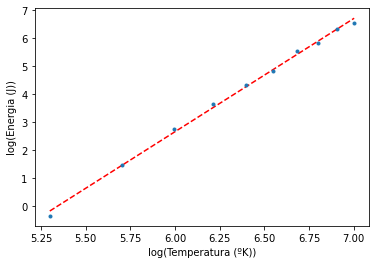

In [9]:
energia_log_ajust = temperatura_log*r_temperature.slope()+r_temperature.b_value()
plt.plot(temperatura_log,energia_log_ajust,'--', color="red")
plt.plot(temperatura_log,energia_log,'.')
plt.xlabel("log(Temperatura (ºK))")
plt.ylabel("log(Energia (J))")
# NOTA o enunciado diz que a potencia medida é para um corpo negro de 100cm2. A contante tem unidade de K/m2.T4
print("constante Stefan-Boltzamnn (sigma) = {} w/m^2k^4".format(np.exp(r_temperatu-re.b_value())*100))
print("constante Stefan-Boltzamnn teórico = 5.67e-08 w/m^2k^4")